In [1]:
"""
Name - Matrikelnummer 
1) Pham, Ngoc Anh Trung - 7176267
2) Viktor Vironski - 4330455
3) Andy Disser - 5984875

Exercise Sheet 7
"""

import numpy as np
import matplotlib.pyplot as plt

# load file
data = np.loadtxt('fisher_iris_shuffled.txt')

n = data.shape[0]  # number of samples
m = data.shape[1]  # number of features

# Compute mean and standard deviation
means = np.divide(np.apply_over_axes(np.sum, data, 0), n)
std = np.sqrt(np.divide(np.apply_over_axes(np.sum, np.power(data-means, 2), 0), n))

# Normalize the data
normalized_data = np.divide(data-means, std)

# Compute covariance matrix
cov_matrix = np.divide(np.matmul(np.transpose(normalized_data), normalized_data), n)

# Compute eigenvalues and eigenvectors of covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvectors\n", eigenvectors)
print("Eigenvalues:", eigenvalues)

[[ 1.         -0.10936925  0.87175416]
 [-0.10936925  1.         -0.4205161 ]
 [ 0.87175416 -0.4205161   1.        ]]
Eigenvectors
 [[-0.63137983  0.64685642  0.42771052]
 [ 0.35424227 -0.25005463  0.90110216]
 [-0.6898347  -0.72045087  0.07126444]]
Eigenvalues: [2.01382631 0.07134297 0.91483072]


Answer to the question **"What can the corresponding eigenvalues tell you about the structure of the data"** 

The corresponding eigenvalue of an eigenvector tell the sum of squared distances from the origin to the projections to the (line formed by the eigenvector) of the points. Thus the higher an eigenvalue is, the more greatly the points variate along the line formed by its corresponding eigenvector.

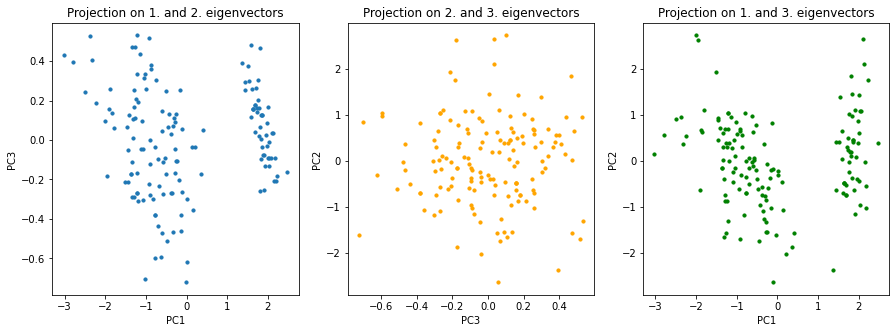

In [40]:
# all 3 possible combination of 2 eigenvectors
combi = np.array([[0, 1], [1, 2], [0, 2]])

# Broadcast to the suitable shapes
b_combi = np.broadcast_to(combi[:, np.newaxis, :], (3, 3, 2))
b_normdata = np.broadcast_to(normalized_data[np.newaxis, :, :], (3, 150, 3))
b_eigenvectors = np.broadcast_to(eigenvectors[np.newaxis, :, :], (3, 3, 3))

# an array of shape 3x3x2, each (3x2) subarray represents a subset of eigenvectors of size 2
subsets_of_eigenvec = np.take_along_axis(b_eigenvectors, b_combi, axis=2)

# all 3 different projections, store in a single array with shape 3x150x2
projections = np.matmul(b_normdata, subsets_of_eigenvec)

f3, axarr = plt.subplots(1,3, figsize=(15,5))        # Define the plot axes.
axarr[0].scatter(projections[0, :, 0], projections[0, :, 1], s=10)      # Define the first plot.
axarr[0].set_xlabel("PC1")
axarr[0].set_ylabel("PC3")
axarr[0].set_title("Projection on 1. and 2. eigenvectors")

axarr[1].scatter(projections[1, :, 0], projections[1, :, 1], s=10, color='orange')      # Define the first plot.
axarr[1].set_xlabel("PC3")
axarr[1].set_ylabel("PC2")
axarr[1].set_title("Projection on 2. and 3. eigenvectors")

axarr[2].scatter(projections[2, :, 0], projections[2, :, 1], s=10, color='green')      # Define the first plot.
axarr[2].set_xlabel("PC1")
axarr[2].set_ylabel("PC2")
axarr[2].set_title("Projection on 1. and 3. eigenvectors")

plt.show()

**Observation:**
- We see that the points which initially are in 3D now get flattened in 2D and the distribution of the points is different in each projection
- By the third plot, which is the projection on the 2 most important PCs, it captures most of the variation of the points in 3D where as by the second plot, which is the projection on the 2 least important PCs, the points seem to not correlated as much as the third plot and are somewhat randomly distributed

**How did the projection transform the data:**

- The Projection ignores a principal component (eigenvector) and projects the points onto the plane which goes through the origin and is formed by the 2 other PCs.
- For instance in the third plot, where it is a projection on the PC1 and PC2, the PC3 was ignored and all the points were projected onto the plane that was formed by the PC1 and PC2.

In [38]:
# Compute normalized eigenvalues.
normalized_eigenvalues = np.divide(eigenvalues, np.sum(eigenvalues))

# Compute the 3 projections of the data onto 3 PCs.
projection_on_PCs = np.matmul(normalized_data, eigenvectors)

# Compute their means and variances
projection_means = np.divide(np.apply_over_axes(np.sum, projection_on_PCs, 0), n)
projection_variances = np.sqrt(np.divide(np.apply_over_axes(np.sum, np.power(projection_on_PCs-projection_means, 2), 0), n))

print("Normalized eigenvalues:", normalized_eigenvalues)
print("Normalized variances:", np.divide(projection_variances, np.sum(projection_variances)).reshape(3))

Normalized eigenvalues: [0.67127544 0.02378099 0.30494357]
Normalized variances: [0.53699387 0.10107271 0.36193342]


- The variances compared to the corresponding eigenvalues are slightly different
- However, the normalized variance of PC1 is still the largest variance and the normalized variance of PC3 (the least important, i.e. PC with eigenvalue 0.02378099) is still the smallest variance